In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import control as ctrl
import sympy as sp



1. *Função de Transferência $G_{vd}(s)$*:
   - Representa a relação entre a variação na tensão de saída ($\hat{v}_o(s)$) e a variação na razão cíclica $d(s)$, mantendo a tensão de entrada $v_i(s)$ constante.
   - Fórmula:
\
   $G_{vd}(s) = \frac{V_i}{L_o C_o s^2 + \frac{L_o}{R_o} s + 1}$

   Onde $V_i$ é a tensão de entrada, $D$ é a razão cíclica, $L_o$ é a indutância, $C_o$ é a capacitância e $R_o$ é a resistência.

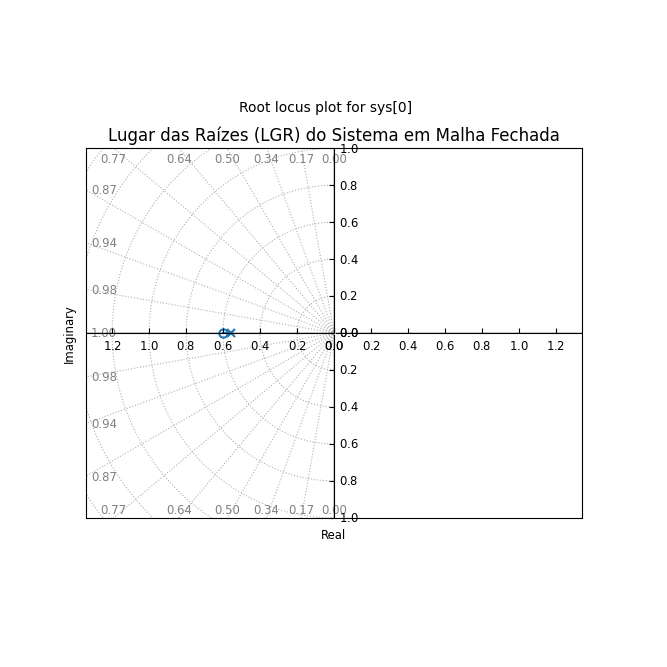

In [3]:


# Definindo os coeficientes do numerador e denominador do sistema em malha fechada
numerator = [12.5, 7.5]  # Coeficientes do numerador
denominator = [3.125*10**-9, 13.5, 7.5]  # Coeficientes do denominador

# Função de transferência em malha fechada
G_closed_loop = ctrl.TransferFunction(numerator, denominator)

# LGR (Lugar das Raízes)
plt.figure()
ctrl.root_locus(G_closed_loop)
plt.title('Lugar das Raízes (LGR) do Sistema em Malha Fechada')
plt.grid(True)

# Removendo os números dos eixos
plt.xticks([])  # Remove os números do eixo x
plt.yticks([])  # Remove os números do eixo y
plt.xlim([-1, 1]) #para vizualizar melhor
plt.ylim([-1, 1]) #para vizualizar melhor
plt.show()


In [ ]:

# Definindo as variáveis s
s = sp.symbols('s')

# Definir os componentes da função de transferência
G = 5 / (10**-9 * s**2 + 3.125 * 10**-9 * s + 1)   # Planta
C = (2.5 + 1.5/s)                                 # Controladr
# Função de transferência 
CG = C * G # Função de transferência em malha aberta
T = CG / (1 + CG) # Função de transferência em malha fechada

# Simplifique a função de transferência em malha fechada
T_simplified = sp.simplify(T)
T_simplified


(12.5*s + 7.5)/(1.0e-9*s**3 + 3.125e-9*s**2 + 13.5*s + 7.5)

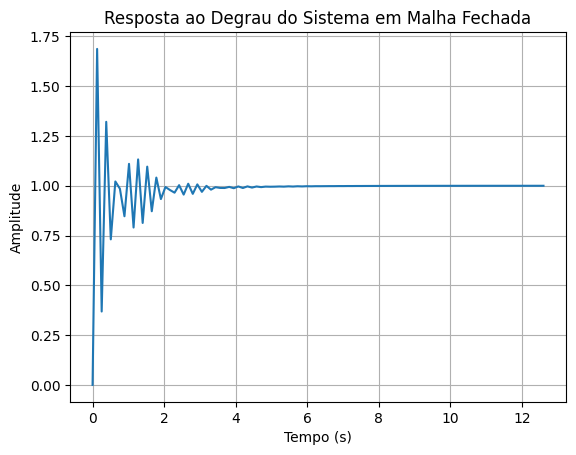

In [5]:

# Definindo os coeficientes do numerador e denominador da função de transferência
numerator = [12.5, 7.5]  # Numerador: 5s + 1
denominator = [10**-9,3.125*10**-9, 13.5, 7.5]  # Denominador

# Criando a função de transferência
system = signal.TransferFunction(numerator, denominator)

# Simulação da resposta ao degrau
t, y = signal.step(system)

# Plotando a resposta ao degrau
plt.plot(t, y)
plt.title("Resposta ao Degrau do Sistema em Malha Fechada")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


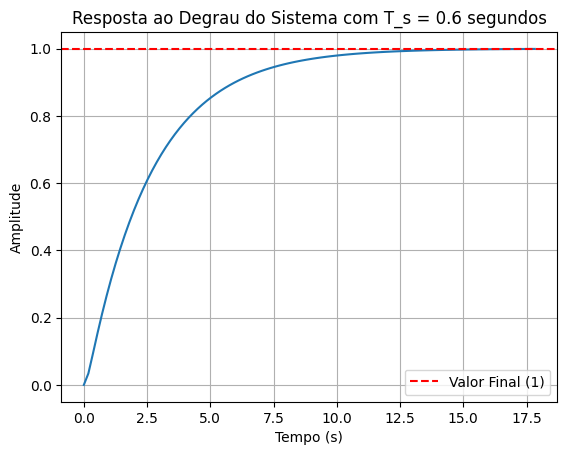

Overshoot do sistema: -0.10%


In [6]:

# Definindo os parâmetros do sistema
T_s = 0.6  # Tempo de assentamento desejado

# Estimando zeta e omega_n
# Para um T_s de 1.333 e um sistema padrão de segunda ordem, podemos escolher zeta = 0.7
zeta = 2.4644
omega_n = 2.739 / (T_s * zeta)  # Calculando a frequência natural

# Definindo a função de transferência do sistema de segunda ordem
numerator = [omega_n**2]
denominator = [1, 2*zeta*omega_n, omega_n**2]
system = signal.TransferFunction(numerator, denominator)

# Simulando a resposta ao degrau
t, y = signal.step(system)

# Plotando a resposta ao degrau
plt.plot(t, y)
plt.title("Resposta ao Degrau do Sistema com T_s = 0.6 segundos")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.axhline(y=1, color='r', linestyle='--', label='Valor Final (1)')
plt.legend()
plt.show()

# Calculando o overshoot
overshoot = (np.max(y) - 1) * 100  # Percentual de overshoot
print(f"Overshoot do sistema: {overshoot:.2f}%")